# Blood Glucose Control - EDA

**Name:** Rebecca Ma



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD.

In [29]:
import pandas as pd

# load csv files
df_500030 = pd.read_csv("../data/gluroo_500030.csv")
df_679372 = pd.read_csv("../data/gluroo_679372.csv")

# add new column to identify patient
df_500030['patient_id'] = '500030'
df_679372['patient_id'] = '679372'

# merge datasets
df = pd.concat([df_500030, df_679372], ignore_index = True)

# display few rows of data
df.head()

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,patient_id
0,2024-05-01 00:00:27.029000-05:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 00:05:27.183000-05:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 00:10:26.949000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 00:15:27.180000-05:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 00:20:27.021000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet.

**1st Visualization:** Time-Series Analysis of BLG for Patient 500030 on one day (2024-05-01). Labelled meals and insulin are displayed in hopes of seeing correlation between food and insulin intake and glucose level. This relates to objective #1 of the project, which is to identify unlabelled meals in BG data based on previous labelled data and also helps patients understand their patterns after each day.

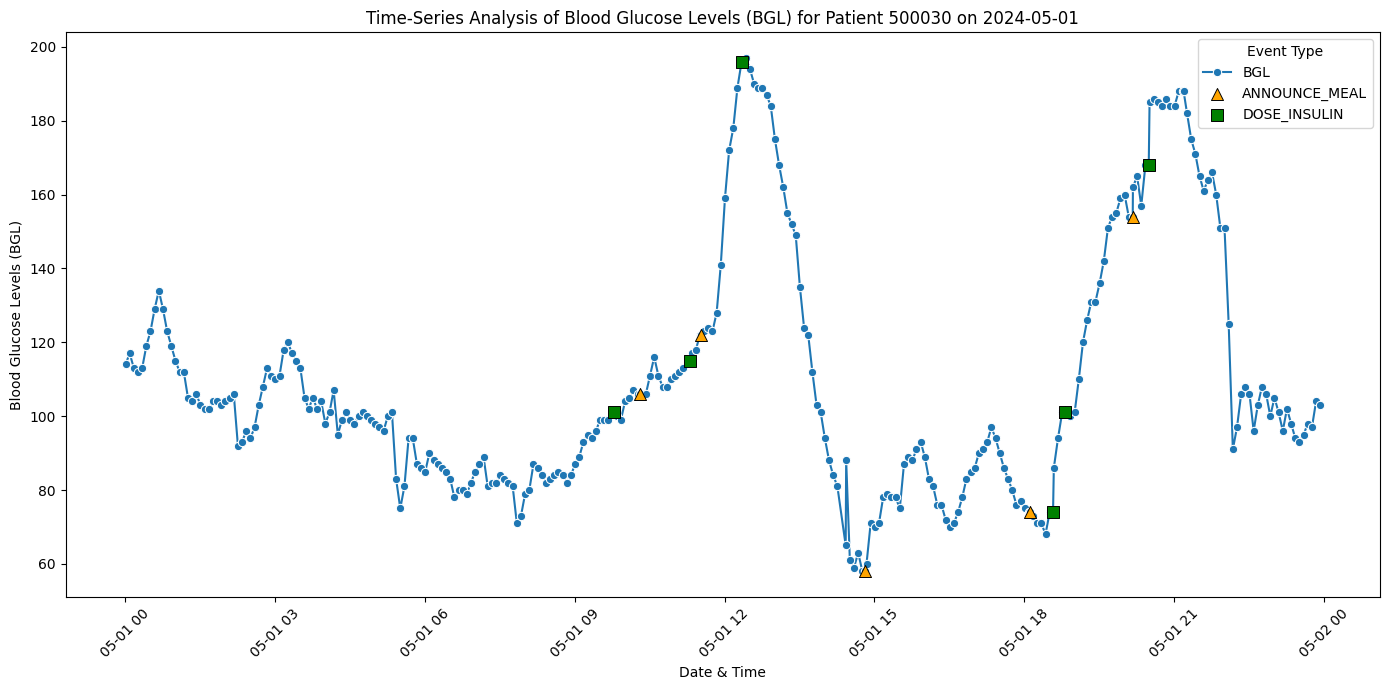

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['date'] = pd.to_datetime(df['date'], errors='coerce')

# filter data by patient, starting with 500030
p_500030_data = df[df['patient_id'] == '500030']

# select one day
single_day_data = p_500030_data[p_500030_data['date'].dt.date == pd.Timestamp('2024-05-01').date()]

# sort data by date
single_day_data = single_day_data.sort_values(by='date')

plt.figure(figsize=(14, 7))

sns.lineplot(data=single_day_data, x='date', y='bgl', marker="o", label='BGL')

# scatter plot markers (for food intake and insulin dose)
markers = {'ANNOUNCE_MEAL': "^", 'DOSE_INSULIN': "s"}
colors = {'ANNOUNCE_MEAL': 'orange', 'DOSE_INSULIN': 'green'}

for event_type in markers.keys():
    event_data = single_day_data[single_day_data['msg_type'] == event_type]
    if not event_data.empty:  # check if there's data for this event type
        sns.scatterplot(
            data=event_data,
            x='date',
            y='bgl',
            marker=markers[event_type],
            color=colors[event_type],
            label=event_type,
            s=75, # size of markers
            edgecolor='black',
            zorder=2  # markers are above the BGL plot
        )
    else:
        print(f"There is no data for this event type: {event_type}")

# plotting
plt.title("Time-Series Analysis of Blood Glucose Levels (BGL) for Patient 500030 on 2024-05-01")
plt.xlabel("Date & Time")
plt.ylabel("Blood Glucose Levels (BGL)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(title='Event Type')

plt.show()

**2nd Visualization:** Blood glucose levels over a short period of time after food or insulin intake.



Meal Events for Patient 500030 on 2024-05-01
--------------------------------------------
                            date                                  text
2024-05-01 10:18:19.656000-05:00                        15g cappuccino
2024-05-01 11:31:32.223000-05:00             40g eggs, toast, mandarin
2024-05-01 14:48:10.002000-05:00                     15g wasa, Nutella
2024-05-01 18:06:44.995000-05:00                            12g rx bar
2024-05-01 18:48:58.246000-05:00 60g Chick-fil-A salad, nuggets, chips
2024-05-01 20:10:16.574000-05:00                              6g taffy

Insulin Events for Patient 500030 on 2024-05-01
-----------------------------------------------
                            date     text
2024-05-01 09:46:39.884000-05:00 Dosed 4u
2024-05-01 11:18:11.771000-05:00 Dosed 9u
2024-05-01 12:21:09.669000-05:00 Dosed 5u
2024-05-01 18:34:32.548000-05:00 Dosed 8u
2024-05-01 18:48:21.494000-05:00 Dosed 3u
2024-05-01 20:29:30.010000-05:00 Dosed 5u


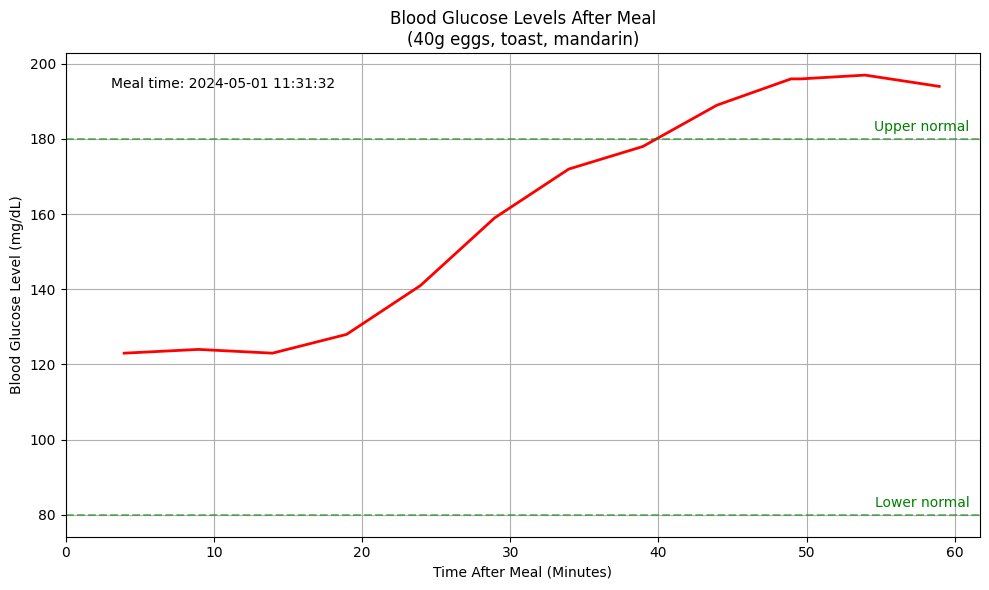

In [35]:
from datetime import timedelta

'''
note: this visualization is an extension of the previous plot for the same patient.
'''

# filter for ANNOUNCE_MEAL and DOSE_INSULIN events
insulin_events = single_day_data[single_day_data['msg_type'] == 'DOSE_INSULIN']
meal_events = single_day_data[single_day_data['msg_type'] == 'ANNOUNCE_MEAL']

meal_table = meal_events[['date', 'text']]
insulin_table = insulin_events[['date', 'text']]

# print meals of the day in a table
def display_table_with_title(df, title):
    print(f"\n{title}\n{'-' * len(title)}")
    print(df.to_string(index=False))


display_table_with_title(meal_table, "Meal Events for Patient 500030 on 2024-05-01")
display_table_with_title(insulin_table, "Insulin Events for Patient 500030 on 2024-05-01")

# plot one specific instance
target_meal = "40g eggs, toast, mandarin" # for future, could include labels for types of meals (breakfast, dinner)
meal_event = single_day_data[(single_day_data['msg_type'] == 'ANNOUNCE_MEAL') & (single_day_data['text'].str.contains(target_meal, case=False, na=False))]

if meal_event.empty:
    raise ValueError(f"No meal event found matching '{target_meal}'")

target_meal_time = meal_event['date'].iloc[0] # find matching meal time for plotting

# visualize glucose levels 1hr after food or insulin intake
def get_glucose_after_event(event_time, duration):
    end_time = event_time + duration
    glucose_data = single_day_data[(single_day_data['date'] > event_time) & (single_day_data['date'] <= end_time)]
    return glucose_data[['date', 'bgl']]


meal_glucose = get_glucose_after_event(target_meal_time, timedelta(hours=1))

plt.figure(figsize=(10, 6))

# plot glucose levels
plt.plot((meal_glucose['date'] - target_meal_time).dt.total_seconds() / 60,
         meal_glucose['bgl'], 'r-', linewidth=2)

plt.title(f'Blood Glucose Levels After Meal\n({target_meal})')
plt.xlabel('Time After Meal (Minutes)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.grid(True)

# add meal time
plt.text(0.05, 0.95, f"Meal time: {target_meal_time.strftime('%Y-%m-%d %H:%M:%S')}",
         transform=plt.gca().transAxes, verticalalignment='top')

plt.xticks(range(0, 61, 10))

# add boundaries to indicate glucose range
plt.axhline(y=80, color='g', linestyle='--', alpha=0.5)
plt.axhline(y=180, color='g', linestyle='--', alpha=0.5)
plt.text(61, 85, 'Lower normal', verticalalignment='top', horizontalalignment='right', color='g')
plt.text(61, 185, 'Upper normal', verticalalignment='top', horizontalalignment='right', color='g')

plt.tight_layout()
plt.show()

The plot above shows the increase in blood glucose levels after consuming 40g of eggs, toast, and mandarin. At 40 minutes, the BGL exceeds the upper limit. This information can be used to alert the patient and provide them with guidance for how much insulin to take.

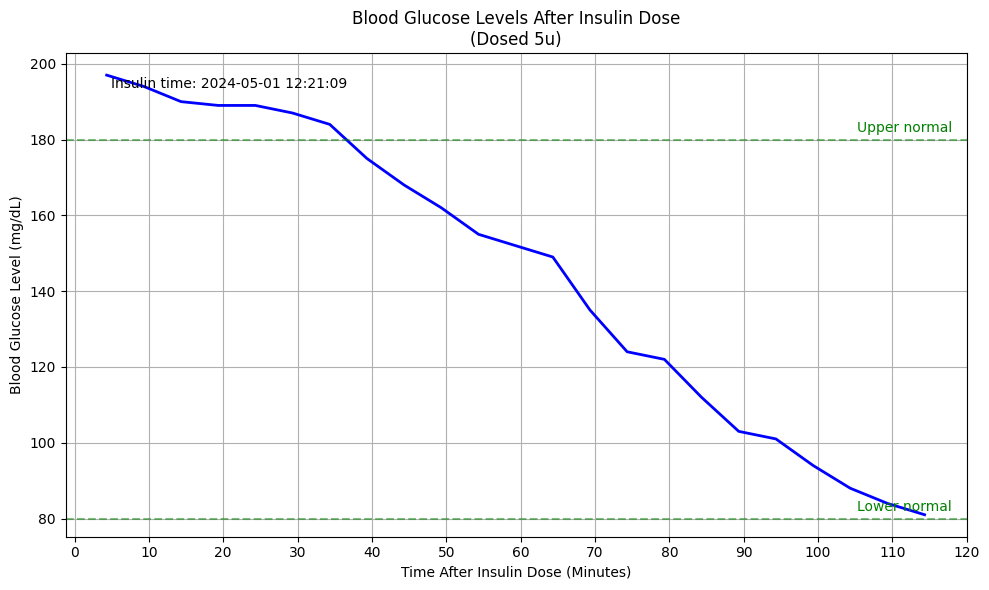

In [38]:
target_insulin = "Dosed 5u" # following the 40g eggs, toast, and mandarin
insulin_event = single_day_data[(single_day_data['msg_type'] == 'DOSE_INSULIN') & (single_day_data['text'].str.contains(target_insulin, case=False, na=False))]

if insulin_event.empty:
    raise ValueError(f"No insulin event found matching '{target_insulin}'")

target_insulin_time = insulin_event['date'].iloc[0]

insulin_glucose = get_glucose_after_event(target_insulin_time, timedelta(hours=2)) # 2 hours after eating

plt.figure(figsize=(10, 6))

# plot glucose levels
time_after_dose = (insulin_glucose['date'] - target_insulin_time).dt.total_seconds() / 60
glucose_levels = insulin_glucose['bgl']

plt.plot(time_after_dose, glucose_levels, 'b-', linewidth=2)

plt.title(f'Blood Glucose Levels After Insulin Dose\n({target_insulin})')
plt.xlabel('Time After Insulin Dose (Minutes)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.grid(True)

# add insulin time
plt.text(0.05, 0.95, f"Insulin time: {target_insulin_time.strftime('%Y-%m-%d %H:%M:%S')}",
         transform=plt.gca().transAxes, verticalalignment='top')

plt.xticks(range(0, 121, 10))

plt.axhline(y=80, color='g', linestyle='--', alpha=0.5)
plt.axhline(y=180, color='g', linestyle='--', alpha=0.5)
plt.text(118, 85, 'Lower normal', verticalalignment='top', horizontalalignment='right', color='g')
plt.text(118, 185, 'Upper normal', verticalalignment='top', horizontalalignment='right', color='g')

plt.tight_layout()
plt.show()

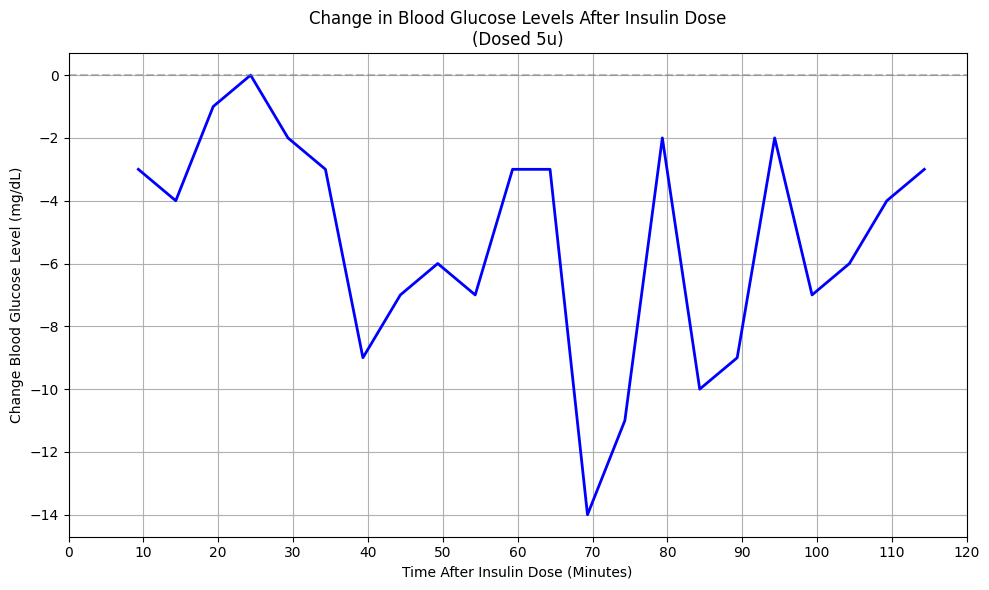

In [39]:
import numpy as np

plt.figure(figsize=(10, 6))

# rate of change in glucose levels
glucose_change = np.diff(glucose_levels)

plt.plot(time_after_dose[1:], glucose_change, 'b-', linewidth=2)

plt.title(f'Change in Blood Glucose Levels After Insulin Dose\n({target_insulin})')
plt.xlabel('Time After Insulin Dose (Minutes)')
plt.ylabel('Change Blood Glucose Level (mg/dL)')
plt.grid(True)

plt.xticks(range(0, 121, 10))
plt.axhline(0, color='gray', linestyle='--', alpha=0.5) # show no change

plt.tight_layout()
plt.show()

This is to visualize BGL decreasing over time (for the next 2 hours) once insulin is taken by the patient. I was also curious about the glucose level change/decreasing rate after an insulin dosage. For future visualizations, perhaps it would be helpful to compare this with similar dosages (although context dependent since food and exercise are both major factors).

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.*

1. How do different types of foods and macronutrient balances affect blood glucose levels? How can we incorporate this information into our data visualization to better identify trends when recording meals?
2. Are there established guidelines for insulin dosages in various situations, such as before meals, after meals, and before exercise? From my initial analysis/first glance, it seems there isn’t a clear pattern in insulin dosages and timing.

Also I think it's super cool that some of the team members have TD1! I'm super curious about the data collection process (assuming that the data came from our own members) - how is tracking diet and insulin integrated with CGM?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future.

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`